In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

#LOAD REQUIERD PACKAGES 
import os # OS library 
import pandas as pd #the csv reading library 
import matplotlib.pyplot as plt #the ploting library 
import glob #to get file names 

from scipy.interpolate import PchipInterpolator # Interpolator 
import numpy as np 
from scipy.optimize import curve_fit 
from scipy.optimize import minimize 
import re

In [2]:
files = glob.glob(f'../../Dissertation_projects/Absorption_experiments/Data/O2_testing/UV_exps_hanna_method_30*/*Sample*.asc')
files

['../../Dissertation_projects/Absorption_experiments/Data/O2_testing\\UV_exps_hanna_method_30_sec_resp_time Saturday, December 7, 2024 1_18 PM Eastern Standard Time\\Sample65_n2.Sample.Raw.asc',
 '../../Dissertation_projects/Absorption_experiments/Data/O2_testing\\UV_exps_hanna_method_30_sec_resp_time Saturday, December 7, 2024 1_18 PM Eastern Standard Time\\Sample66_n2.Sample.Raw.asc',
 '../../Dissertation_projects/Absorption_experiments/Data/O2_testing\\UV_exps_hanna_method_30_sec_resp_time Saturday, December 7, 2024 1_18 PM Eastern Standard Time\\Sample67_n2.Sample.Raw.asc',
 '../../Dissertation_projects/Absorption_experiments/Data/O2_testing\\UV_exps_hanna_method_30_sec_resp_time Saturday, December 7, 2024 1_18 PM Eastern Standard Time\\Sample68_n2.Sample.Raw.asc',
 '../../Dissertation_projects/Absorption_experiments/Data/O2_testing\\UV_exps_hanna_method_30_sec_resp_time Saturday, December 7, 2024 1_18 PM Eastern Standard Time\\Sample69_n2.Sample.Raw.asc',
 '../../Dissertation_proj

In [3]:
df = pd.read_table(files[0], skiprows=91,names=['wl', 'abs'], index_col='wl')


with open(files[3], 'r') as f:
        lines = f.readlines()
wl_line = lines[2].strip() 
wl_names = wl_line.split('.')
wl_names[0]

'Sample68_n2'

In [4]:
def open_files(name):
    # reads individual scan files
    df = pd.read_table(name, skiprows=91,names=['wl', 'abs'], index_col='wl')
    # reads individual scan files
    with open(name, 'r') as f:
        lines = f.readlines()
    wl_line = lines[2].strip() 
    wl_names = wl_line.split('.')
    ID = wl_names[0]
    df = df.rename(columns={'abs': ID})
    return df


#LOOP TRU FILES TO MAKE ONE EASY TO USE DATA FRAME 
#columns are scanns and rows are wavelths 
frames = [open_files(f) for f in files]
df = pd.concat(frames, axis=1) # joins along cols  

print("files loaded and the data frame is made")
df

files loaded and the data frame is made


,Sample65_n2,Sample66_n2,Sample67_n2,Sample68_n2,Sample69_n2,Sample70_O2,Sample71_O2,Sample72_O2,Sample73_O2,Sample74_O2,...,Sample40,Sample41,Sample42,Sample43,Sample44,Sample45,Sample46,Sample47,Sample48,Sample49
wl,,,,,,,,,,,,,,,,,,,,,
445.0,0.000055,0.000042,0.000077,0.000085,0.000047,0.000453,0.000330,0.000369,0.000336,0.000290,...,-0.000183,-0.000297,-0.000280,-0.000407,-0.000472,-0.000325,-0.014086,-0.014098,-0.014091,-0.014037
440.0,0.000023,0.000098,0.000092,0.000108,0.000058,0.000471,0.000354,0.000403,0.000374,0.000313,...,-0.000311,-0.000423,-0.000434,-0.000495,-0.000468,-0.000450,-0.014427,-0.014441,-0.014442,-0.014418
435.0,0.000034,0.000005,0.000003,0.000100,0.000051,0.000499,0.000369,0.000409,0.000346,0.000279,...,-0.000354,-0.000462,-0.000550,-0.000569,-0.000463,-0.000490,-0.014681,-0.014705,-0.014691,-0.014670
430.0,0.000038,0.000035,0.000049,0.000051,0.000031,0.000522,0.000297,0.000345,0.000310,0.000334,...,-0.000353,-0.000465,-0.000533,-0.000550,-0.000510,-0.000502,-0.014965,-0.014924,-0.014935,-0.014931
425.0,0.000023,0.000106,0.000042,0.000012,0.000035,0.000509,0.000376,0.000371,0.000332,0.000359,...,-0.000360,-0.000483,-0.000595,-0.000626,-0.000573,-0.000541,-0.015190,-0.015166,-0.015166,-0.015189
420.0,0.000087,0.000093,0.000077,0.000070,0.000100,0.000507,0.000401,0.000396,0.000346,0.000385,...,-0.000386,-0.000425,-0.000527,-0.000504,-0.000488,-0.000460,-0.015363,-0.015319,-0.015292,-0.015342
415.0,0.000108,0.000084,0.000054,0.000066,0.000079,0.000528,0.000403,0.000403,0.000342,0.000331,...,-0.000252,-0.000218,-0.000275,-0.000328,-0.000386,-0.000282,-0.015424,-0.015350,-0.015389,-0.015384
410.0,0.000103,0.000034,0.000075,0.000050,0.000075,0.000604,0.000390,0.000371,0.000381,0.000331,...,-0.000257,-0.000249,-0.000298,-0.000346,-0.000385,-0.000174,-0.015644,-0.015584,-0.015628,-0.015620
405.0,0.000118,0.000078,0.000048,0.000054,0.000072,0.000522,0.000416,0.000409,0.000368,0.000349,...,-0.000265,-0.000346,-0.000337,-0.000401,-0.000376,-0.000227,-0.015994,-0.015920,-0.015976,-0.015936


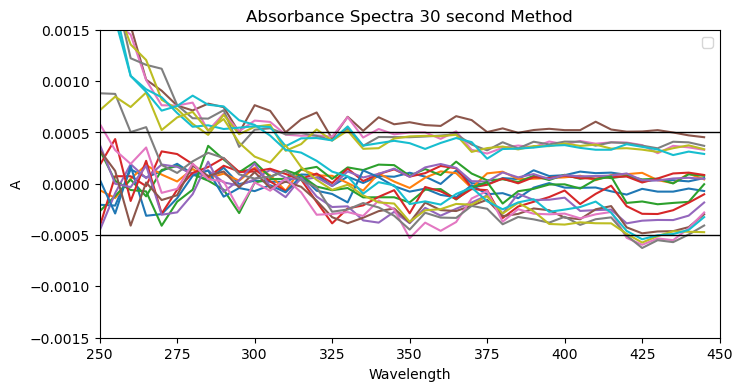

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.0015,0.0015)
axs.set_xlabel("Wavelength")
axs.axhline(y=0.0005, color='black', linewidth=1)
axs.axhline(y=-0.0005, color='black', linewidth=1)
axs.set_ylabel("A")
axs.legend("")
axs.set_title("Absorbance Spectra 30 second Method")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/O2_testing/absorbance.png")


In [6]:
df.columns

Index(['Sample65_n2', 'Sample66_n2', 'Sample67_n2', 'Sample68_n2',
       'Sample69_n2', 'Sample70_O2', 'Sample71_O2', 'Sample72_O2',
       'Sample73_O2', 'Sample74_O2', 'Sample36', 'Sample37', 'Sample38',
       'Sample39', 'Sample40', 'Sample41', 'Sample42', 'Sample43', 'Sample44',
       'Sample45', 'Sample46', 'Sample47', 'Sample48', 'Sample49'],
      dtype='object')

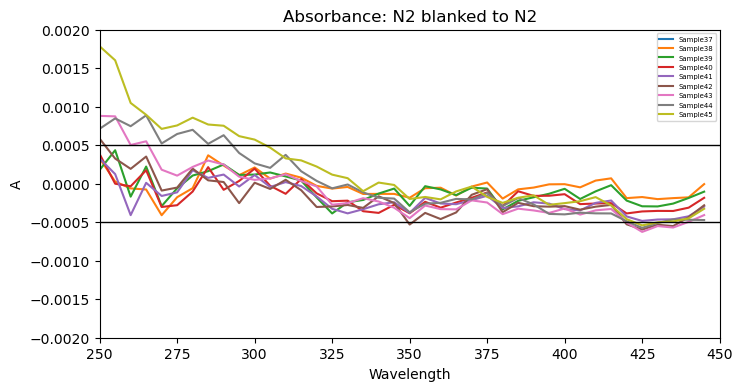

In [7]:
df_blanks_n2 = df[['Sample37', 'Sample38', 'Sample39', 'Sample40', 'Sample41', 'Sample42', 'Sample43', 'Sample44', 'Sample45']]
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_blanks_n2.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.002,0.002)
axs.set_xlabel("Wavelength")
axs.axhline(y=0.0005, color='black', linewidth=1)
axs.axhline(y=-0.0005, color='black', linewidth=1)
axs.set_ylabel("A")
axs.legend(fontsize=5)
axs.set_title("Absorbance: N2 blanked to N2")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/O2_testing/absorbance_N2_blank.png")


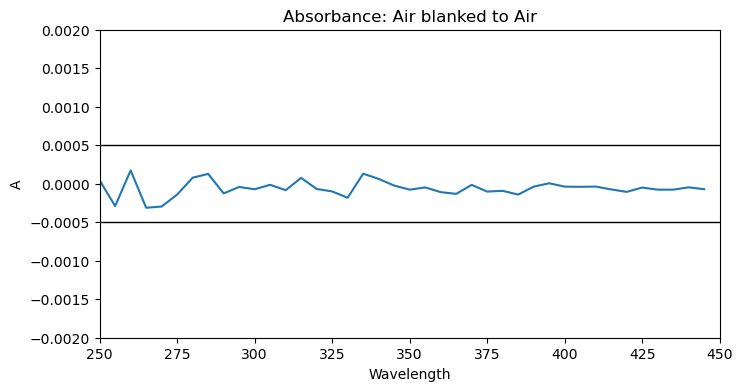

In [8]:
df_blanks_air = df['Sample36']
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_blanks_air.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.002,0.002)
axs.set_xlabel("Wavelength")
axs.axhline(y=0.0005, color='black', linewidth=1)
axs.axhline(y=-0.0005, color='black', linewidth=1)
axs.set_ylabel("A")
axs.legend([], [], frameon=False)
axs.set_title("Absorbance: Air blanked to Air")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/O2_testing/absorbance_air_blank.png")


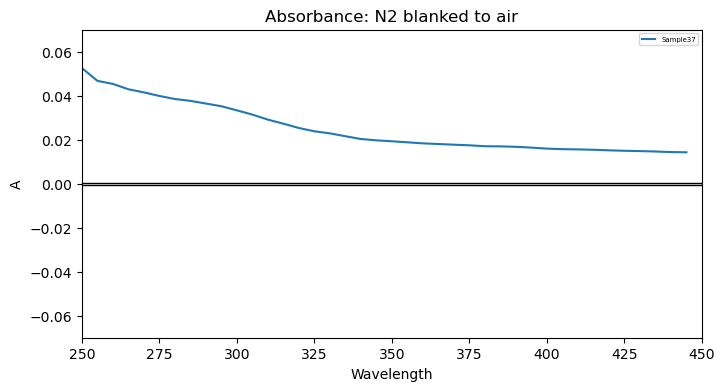

In [9]:
df_n2_air = df['Sample37']
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_n2_air.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.07,0.07)
axs.set_xlabel("Wavelength")
axs.axhline(y=0.0005, color='black', linewidth=1)
axs.axhline(y=-0.0005, color='black', linewidth=1)
axs.set_ylabel("A")
axs.legend(fontsize=5)
axs.set_title("Absorbance: N2 blanked to air")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/O2_testing/N2_blanked_air.png")


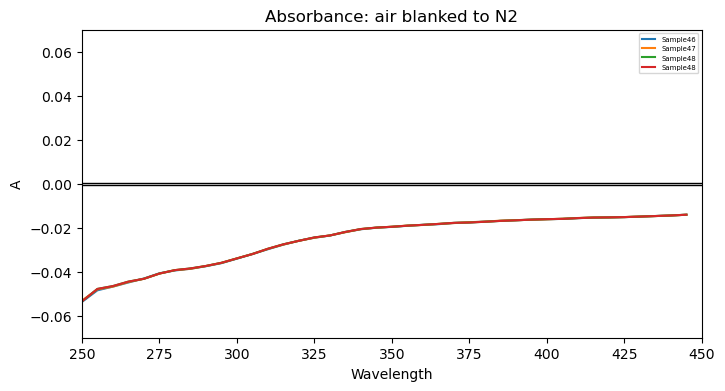

In [10]:
df_air_n2 = df[['Sample46', 'Sample47', 'Sample48', 'Sample48']]
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_air_n2.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.07,.07)
axs.set_xlabel("Wavelength")
axs.axhline(y=0.0005, color='black', linewidth=1)
axs.axhline(y=-0.0005, color='black', linewidth=1)
axs.set_ylabel("A")
axs.legend(fontsize=5)
axs.set_title("Absorbance: air blanked to N2")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/O2_testing/air_blanked_N2.png")


In [11]:
df_abs = df*2.303/.1

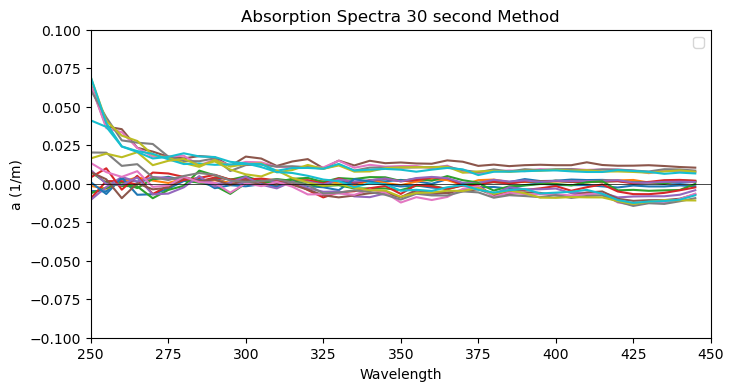

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_abs.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.1,0.1)
axs.axhline(y=0, color='black', linewidth=.5)
#axs.axhline(y=-0.00035, color='black', linewidth=1)
axs.set_xlabel("Wavelength")
axs.set_ylabel("a (1/m)")
axs.legend("")
axs.set_title("Absorption Spectra 30 second Method")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/O2_testing/scanns_abs_30_second_mathod.png")

In [13]:
df_abs

,Sample65_n2,Sample66_n2,Sample67_n2,Sample68_n2,Sample69_n2,Sample70_O2,Sample71_O2,Sample72_O2,Sample73_O2,Sample74_O2,...,Sample40,Sample41,Sample42,Sample43,Sample44,Sample45,Sample46,Sample47,Sample48,Sample49
wl,,,,,,,,,,,,,,,,,,,,,
445.0,0.001267,0.000967,0.001773,0.001958,0.001082,0.010433,0.007600,0.008498,0.007738,0.006679,...,-0.004214,-0.006840,-0.006448,-0.009373,-0.010870,-0.007485,-0.324401,-0.324677,-0.324516,-0.323272
440.0,0.000530,0.002257,0.002119,0.002487,0.001336,0.010847,0.008153,0.009281,0.008613,0.007208,...,-0.007162,-0.009742,-0.009995,-0.011400,-0.010778,-0.010363,-0.332254,-0.332576,-0.332599,-0.332047
435.0,0.000783,0.000115,0.000069,0.002303,0.001175,0.011492,0.008498,0.009419,0.007968,0.006425,...,-0.008153,-0.010640,-0.012666,-0.013104,-0.010663,-0.011285,-0.338103,-0.338656,-0.338334,-0.337850
430.0,0.000875,0.000806,0.001128,0.001175,0.000714,0.012022,0.006840,0.007945,0.007139,0.007692,...,-0.008130,-0.010709,-0.012275,-0.012666,-0.011745,-0.011561,-0.344644,-0.343700,-0.343953,-0.343861
425.0,0.000530,0.002441,0.000967,0.000276,0.000806,0.011722,0.008659,0.008544,0.007646,0.008268,...,-0.008291,-0.011123,-0.013703,-0.014417,-0.013196,-0.012459,-0.349826,-0.349273,-0.349273,-0.349803
420.0,0.002004,0.002142,0.001773,0.001612,0.002303,0.011676,0.009235,0.009120,0.007968,0.008867,...,-0.008890,-0.009788,-0.012137,-0.011607,-0.011239,-0.010594,-0.353810,-0.352797,-0.352175,-0.353326
415.0,0.002487,0.001935,0.001244,0.001520,0.001819,0.012160,0.009281,0.009281,0.007876,0.007623,...,-0.005804,-0.005021,-0.006333,-0.007554,-0.008890,-0.006494,-0.355215,-0.353511,-0.354409,-0.354294
410.0,0.002372,0.000783,0.001727,0.001151,0.001727,0.013910,0.008982,0.008544,0.008774,0.007623,...,-0.005919,-0.005734,-0.006863,-0.007968,-0.008867,-0.004007,-0.360281,-0.358900,-0.359913,-0.359729
405.0,0.002718,0.001796,0.001105,0.001244,0.001658,0.012022,0.009580,0.009419,0.008475,0.008037,...,-0.006103,-0.007968,-0.007761,-0.009235,-0.008659,-0.005228,-0.368342,-0.366638,-0.367927,-0.367006


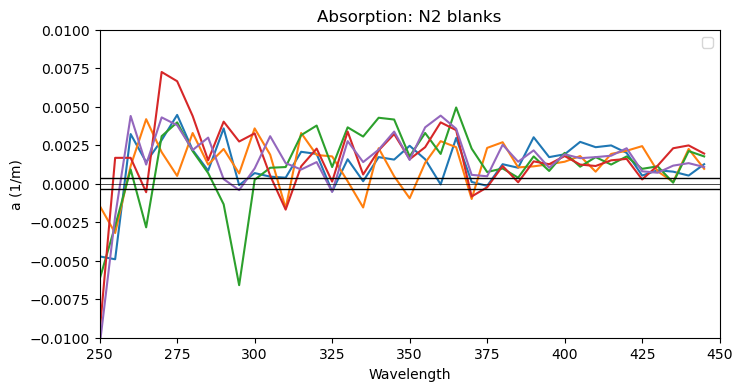

In [14]:
df_abs_n2_blanks = df_abs[['Sample65_n2','Sample66_n2','Sample67_n2','Sample68_n2','Sample69_n2']]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_abs_n2_blanks.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.01,0.01)
axs.axhline(y=0, color='black', linewidth=.5)
axs.axhline(y=0.00035, color='black', linewidth=1)
axs.axhline(y=-0.00035, color='black', linewidth=1)
axs.set_xlabel("Wavelength")
axs.set_ylabel("a (1/m)")
axs.legend("")
axs.set_title("Absorption: N2 blanks")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/O2_testing/abs_N2_blanked_N2.png")

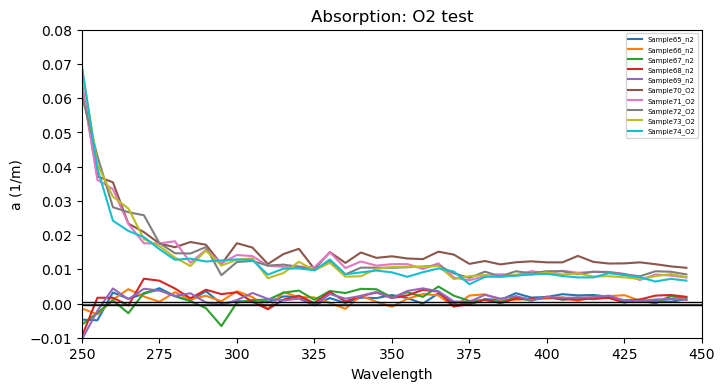

In [15]:
df_abs_n2_exps = df_abs[['Sample65_n2','Sample66_n2','Sample67_n2','Sample68_n2','Sample69_n2','Sample70_O2','Sample71_O2','Sample72_O2','Sample73_O2','Sample74_O2' ]]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_abs_n2_exps.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-0.01,0.08)
axs.axhline(y=0, color='black', linewidth=.5)
axs.axhline(y=0.00035, color='black', linewidth=1)
axs.axhline(y=-0.00035, color='black', linewidth=1)
axs.set_xlabel("Wavelength")
axs.set_ylabel("a (1/m)")
axs.legend(fontsize=5)
axs.set_title("Absorption: O2 test")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/O2_testing/abs_N2_blanked_N2.png")

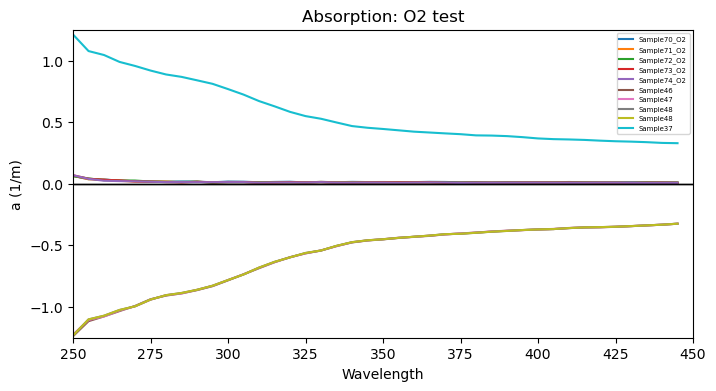

In [16]:
df_abs_O2 = df_abs[['Sample70_O2','Sample71_O2','Sample72_O2','Sample73_O2','Sample74_O2','Sample46', 'Sample47', 'Sample48', 'Sample48','Sample37']]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_abs_O2.plot(ax=axs)
axs.set_xlim(250,450)
axs.set_ylim(-1.25,1.25)
axs.axhline(y=0, color='black', linewidth=.5)
axs.axhline(y=0.00035, color='black', linewidth=1)
axs.axhline(y=-0.00035, color='black', linewidth=1)
axs.set_xlabel("Wavelength")
axs.set_ylabel("a (1/m)")
axs.legend(fontsize=5)
axs.set_title("Absorption: O2 test")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/O2_testing/abs_all_abs_O2.png")


In [17]:
def JF2007_aw_UV(wl, T):
    """
    Parameters:
    wl : array-like or float
        Wavelength in nm, should be in the 180-420 nm range.
    T : float
        Temperature in degrees Celsius.
    
    Returns:
    a : array-like or float
        Combined absorption coefficient.
    a_QI_fit : array-like or float
        Quantum interference term of the absorption coefficient.
    a_GH_fit : array-like or float
        General harmonic term of the absorption coefficient.
    """
    
    # Convert wavelength to frequency in 1/cm
    v = (1 / 150 - 1 / wl) * 1e7
    
    # Convert temperature to Kelvin
    K = T + 273
    
    # Calculate Zc
    Zc = (v ** (11 / 12) / np.sqrt(K)) ** (2 / 3)
    
    # Calculate a_QI_fit from JF2007, Eq. 2.82
    a_QI_fit = 5e6 * v ** (-5 / 4) * np.exp(-0.076 * Zc)
    
    # Calculate a_GH_fit from JF2007, Eq. 2.78-2.79
    a_GH_fit = 7.067e-40 * np.exp(119 * 150 / (wl - (0.0465 * (T - 25))))
    
    # Calculate total absorption coefficient
    a = a_QI_fit + a_GH_fit
    
    return a, a_QI_fit, a_GH_fit


# this is the function to minimize the root mean squared 
def rmse(T, col_abs):
    cor = JF2007_aw_UV(wl, T)
    a = cor[0]
    col_resid = col_abs - a
    diff = np.sqrt(np.mean(col_resid**2))
    return  diff



In [18]:
## DO the TEMP correction ##

df_abs['wl'] = df_abs.index
df_abs_cut = df_abs[df_abs['wl'] <= 420]

####### OLD ###########
wl = df_abs_cut['wl'].to_numpy()
df_abs_cut = df_abs_cut.drop('wl', axis = 1)


coln = np.arange(0, len(df_abs_cut.columns), 1, dtype=int)
Frames = []
frames = []

for col in coln:
    col_abs = df_abs_cut.iloc[:,col].ravel()
    res = minimize(rmse, 0, col_abs) 
    temp_val = res.x[0]
    cor = JF2007_aw_UV(wl, res.x)
    a = cor[0]
    col_ct = col_abs - a
    col_ct_data_frame = pd.DataFrame(col_ct)
    Frames.append(col_ct_data_frame)
    col_ct_resid = col_ct-(df_abs_cut.iloc[:,col].ravel())
    temp_rmse = np.sqrt(np.mean(col_ct_resid**2))
    dict = {'temp_val':[temp_val], 
           'temp_rmse':[temp_rmse]}
    diff = pd.DataFrame(dict)
    frames.append(diff) #save the inportant outputs 

outputs = pd.concat(frames, axis=0, ignore_index=False)
New_Labels = df.columns
outputs.index = list(New_Labels)

df_temp_corrected = pd.concat(Frames, axis=1, ignore_index=False)
New_Labels = df.columns
df_temp_corrected.columns = New_Labels
df_temp_corrected['wl'] = wl
df_temp_corrected.index = df_temp_corrected['wl']
df_temp_corrected = df_temp_corrected.drop('wl', axis = 1)
df_tc = df_temp_corrected
df_temp_corrected

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_25104\1436059240.py:16: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  col_abs = df_abs_cut.iloc[:,col].ravel()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_25104\1436059240.py:24: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  col_ct_resid = col_ct-(df_abs_cut.iloc[:,col].ravel())


,Sample65_n2,Sample66_n2,Sample67_n2,Sample68_n2,Sample69_n2,Sample70_O2,Sample71_O2,Sample72_O2,Sample73_O2,Sample74_O2,...,Sample40,Sample41,Sample42,Sample43,Sample44,Sample45,Sample46,Sample47,Sample48,Sample49
wl,,,,,,,,,,,,,,,,,,,,,
420.0,0.001988,0.002129,0.001753,0.001550,0.002267,0.007643,0.005495,0.005332,0.004182,0.005369,...,-0.008956,-0.009853,-0.012346,-0.012260,-0.012373,-0.012915,-0.353810,-0.352797,-0.352175,-0.353326
415.0,0.002471,0.001921,0.001222,0.001454,0.001781,0.007964,0.005389,0.005340,0.003936,0.003982,...,-0.005873,-0.005089,-0.006554,-0.008238,-0.010076,-0.008915,-0.355215,-0.353511,-0.354409,-0.354294
410.0,0.002355,0.000768,0.001704,0.001081,0.001687,0.009541,0.004927,0.004438,0.004670,0.003829,...,-0.005993,-0.005807,-0.007096,-0.008687,-0.010109,-0.006534,-0.360281,-0.358900,-0.359913,-0.359729
405.0,0.002699,0.001781,0.001080,0.001169,0.001615,0.007465,0.005351,0.005137,0.004194,0.004079,...,-0.006182,-0.008046,-0.008007,-0.009990,-0.009962,-0.007869,-0.368342,-0.366638,-0.367927,-0.367006
400.0,0.001892,0.001411,0.001977,0.001717,0.001866,0.007265,0.004427,0.004970,0.004558,0.004524,...,-0.003216,-0.007682,-0.006962,-0.008210,-0.010533,-0.008567,-0.371290,-0.371842,-0.371105,-0.371013
395.0,0.001706,0.001249,0.000800,0.001182,0.000987,0.007349,0.004847,0.004145,0.003755,0.004196,...,-0.003682,-0.006029,-0.007138,-0.009566,-0.010465,-0.009207,-0.376264,-0.376817,-0.375896,-0.376057
390.0,0.002994,0.001109,0.001742,0.001361,0.002112,0.006841,0.003364,0.004524,0.003559,0.003576,...,-0.003734,-0.005644,-0.007017,-0.008875,-0.007709,-0.006517,-0.381653,-0.381400,-0.383127,-0.381515
385.0,0.001012,0.001039,0.000358,-0.000004,0.001372,0.005969,0.003498,0.002790,0.002562,0.003125,...,-0.002359,-0.006871,-0.006022,-0.008396,-0.005880,-0.007386,-0.388585,-0.386651,-0.389345,-0.388562
380.0,0.001240,0.002672,0.000955,0.001048,0.002473,0.006688,0.002737,0.003915,0.002950,0.002793,...,-0.006834,-0.007384,-0.008852,-0.010087,-0.008365,-0.009096,-0.396323,-0.397198,-0.398120,-0.397912


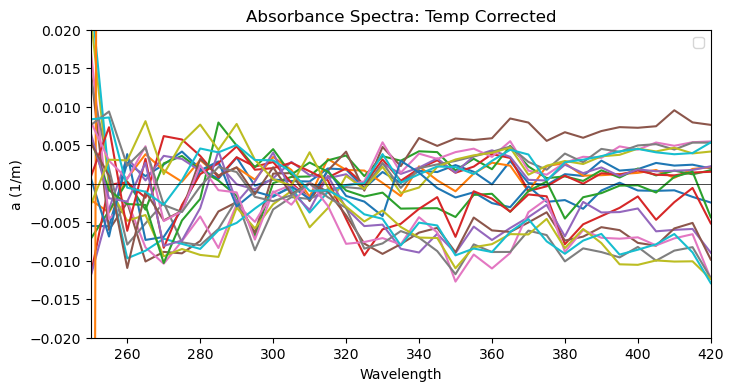

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4)) 
df_temp_corrected.plot(ax=axs)
axs.set_xlim(250,420)
axs.set_ylim(-0.02,0.02)
axs.axhline(y=0, color='black', linewidth=.5)
axs.set_xlabel("Wavelength")
axs.set_ylabel("a (1/m)")
axs.legend("")
axs.set_title("Absorbance Spectra: Temp Corrected")
plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/O2_testing/Abs_scanns_temp_corr_30_second_meth.png")

In [20]:

# Define a function for RMSE
def calculate_rmse(values):
    return np.sqrt(np.mean(np.square(values)))

# Define a function for SEM
def calculate_sem(values):
    return np.std(values, ddof=1) / np.sqrt(len(values))

# Compute the statistics
new_df = pd.DataFrame({
    'mean': df_abs_n2_blanks.apply(lambda row: row.mean(), axis=1),
    'min': df_abs_n2_blanks.apply(lambda row: row.min(), axis=1),
    'max': df_abs_n2_blanks.apply(lambda row: row.max(), axis=1),
    'rmse': df_abs_n2_blanks.apply(lambda row: calculate_rmse(row), axis=1),
    'sem': df_abs_n2_blanks.apply(lambda row: calculate_sem(row), axis=1)
})

new_df['rmse_up'] = new_df['mean'] + new_df['rmse']
new_df['rmse_down'] = new_df['mean'] - new_df['rmse']

new_df['sem_up'] = new_df['mean'] + new_df['sem']
new_df['sem_down'] = new_df['mean'] - new_df['sem']

new_df['range'] = new_df['max'] - new_df['min']
new_df['wl'] = new_df.index


#Data_output_error_test_new_method_30_stats_tc
#new_df.to_csv('../../Dissertation_projects/Absorption_experiments/Data/O2_testing/Data_output_error_test_new_method_30_stats_tc.csv')
df_abs_n2_blanks_stats = new_df
df_abs_n2_blanks_stats

,mean,min,max,rmse,sem,rmse_up,rmse_down,sem_up,sem_down,range,wl
wl,,,,,,,,,,,
445.0,0.001409,0.000967,0.001958,0.001462,0.000194,0.002872,-0.000053,0.001604,0.001215,0.000990,445.0
440.0,0.001746,0.000530,0.002487,0.001889,0.000360,0.003634,-0.000143,0.002106,0.001385,0.001958,440.0
435.0,0.000889,0.000069,0.002303,0.001210,0.000410,0.002098,-0.000321,0.001299,0.000479,0.002234,435.0
430.0,0.000940,0.000714,0.001175,0.000957,0.000090,0.001897,-0.000017,0.001030,0.000849,0.000461,430.0
425.0,0.001004,0.000276,0.002441,0.001257,0.000378,0.002261,-0.000253,0.001382,0.000626,0.002165,425.0
420.0,0.001967,0.001612,0.002303,0.001982,0.000124,0.003949,-0.000016,0.002091,0.001843,0.000691,420.0
415.0,0.001801,0.001244,0.002487,0.001849,0.000210,0.003650,-0.000048,0.002011,0.001591,0.001244,415.0
410.0,0.001552,0.000783,0.002372,0.001645,0.000273,0.003197,-0.000093,0.001825,0.001280,0.001589,410.0
405.0,0.001704,0.001105,0.002718,0.001796,0.000284,0.003500,-0.000092,0.001988,0.001421,0.001612,405.0


In [21]:
df_abs_O2_exps = df_abs[['Sample70_O2','Sample71_O2','Sample72_O2','Sample73_O2','Sample74_O2' ]]

# Define a function for RMSE
def calculate_rmse(values):
    return np.sqrt(np.mean(np.square(values)))

# Define a function for SEM
def calculate_sem(values):
    return np.std(values, ddof=1) / np.sqrt(len(values))

# Compute the statistics
new_df = pd.DataFrame({
    'mean': df_abs_O2_exps.apply(lambda row: row.mean(), axis=1),
    'min': df_abs_O2_exps.apply(lambda row: row.min(), axis=1),
    'max': df_abs_O2_exps.apply(lambda row: row.max(), axis=1),
    'rmse': df_abs_O2_exps.apply(lambda row: calculate_rmse(row), axis=1),
    'sem': df_abs_O2_exps.apply(lambda row: calculate_sem(row), axis=1)
})


new_df['rmse_up'] = new_df['mean'] + new_df['rmse']
new_df['rmse_down'] = new_df['mean'] - new_df['rmse']

new_df['sem_up'] = new_df['mean'] + new_df['sem']
new_df['sem_down'] = new_df['mean'] - new_df['sem']

new_df['range'] = new_df['max'] - new_df['min']
new_df['wl'] = new_df.index




#Data_output_error_test_new_method_30_stats_tc
#new_df.to_csv('../../Dissertation_projects/Absorption_experiments/Data/O2_testing/Data_output_error_test_new_method_30_stats_tc.csv')
df_abs_O2_exps_stats = new_df
df_abs_O2_exps_stats

,mean,min,max,rmse,sem,rmse_up,rmse_down,sem_up,sem_down,range,wl
wl,,,,,,,,,,,
445.0,0.008189,0.006679,0.010433,0.008286,0.000631,0.016476,-0.000097,0.008820,0.007559,0.003754,445.0
440.0,0.008820,0.007208,0.010847,0.008904,0.000609,0.017725,-0.000084,0.009429,0.008212,0.003639,440.0
435.0,0.008761,0.006425,0.011492,0.008919,0.000838,0.017680,-0.000159,0.009599,0.007923,0.005067,435.0
430.0,0.008328,0.006840,0.012022,0.008539,0.000944,0.016867,-0.000211,0.009272,0.007384,0.005182,430.0
425.0,0.008968,0.007646,0.011722,0.009080,0.000711,0.018048,-0.000112,0.009678,0.008257,0.004076,425.0
420.0,0.009373,0.007968,0.011676,0.009454,0.000617,0.018827,-0.000081,0.009990,0.008756,0.003708,420.0
415.0,0.009244,0.007623,0.012160,0.009384,0.000806,0.018628,-0.000140,0.010051,0.008438,0.004537,415.0
410.0,0.009567,0.007623,0.013910,0.009821,0.001110,0.019388,-0.000254,0.010677,0.008456,0.006287,410.0
405.0,0.009507,0.008037,0.012022,0.009607,0.000691,0.019114,-0.000100,0.010198,0.008815,0.003984,405.0


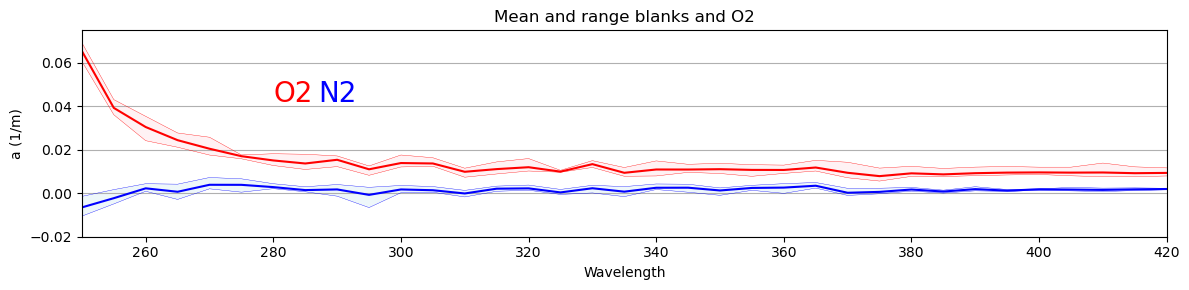

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 3))

axes.plot(df_abs_O2_exps_stats['wl'], df_abs_O2_exps_stats['mean'], color='red', linewidth=1.5)
axes.plot(df_abs_n2_blanks_stats['wl'], df_abs_n2_blanks_stats['mean'], color='blue', linewidth=1.5)

axes.plot(df_abs_O2_exps_stats['wl'], df_abs_O2_exps_stats['max'], color='red', linewidth=.25)
axes.plot(df_abs_O2_exps_stats['wl'], df_abs_O2_exps_stats['min'], color='red', linewidth=.25)

axes.plot(df_abs_n2_blanks_stats['wl'], df_abs_n2_blanks_stats['max'], color='blue', linewidth=.25)
axes.plot(df_abs_n2_blanks_stats['wl'], df_abs_n2_blanks_stats['min'], color='blue', linewidth=.25)

axes.fill_between(df_abs_O2_exps_stats['wl'], df_abs_O2_exps_stats['max'], df_abs_O2_exps_stats['min'], alpha=.2, linewidth=0, color='pink')
axes.fill_between(df_abs_n2_blanks_stats['wl'], df_abs_n2_blanks_stats['max'], df_abs_n2_blanks_stats['min'], alpha=.2, linewidth=0, color='lightblue')

axes.set_xlabel("Wavelength")
axes.set_ylabel("a (1/m)")
axes.set_xlim(250, 420)
axes.set_ylim(-0.02, 0.075)
axes.text(280, .042, 'O2', color='red', size = 20)
axes.text(287, .042, 'N2', color='blue', size = 20)
axs.axhline(y=0.00035, color='black', linewidth=1)
axs.axhline(y=0.00035, color='black', linewidth=1)
plt.title('Mean and range blanks and O2')
plt.tight_layout()
#plt.legend()
plt.grid(axis='y')

plt.savefig("../../Dissertation_projects/Absorption_experiments/Figs/O2_testing/Mean_RMSE_methods.png")
